In [72]:
#Installing modules

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import scipy
import pylab as pl
from scipy.optimize import curve_fit

In [73]:
#Importing the data

data = pd.read_csv('C:\\Users\\colew\\gun-violence-data_01-2013_03-2018.csv')

In [74]:
#Looking at the data initially to start 

data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [75]:
#Cleaning data throught removal of unnecessary columns, rows, and values

data = data.drop(columns = "incident_url")
data = data.drop(columns = "source_url")
data = data.drop(columns = "sources")
data = data.drop(columns = "incident_url_fields_missing")
data = data.drop(columns = "incident_id")
data = data.drop(columns = "gun_stolen")
data = data.drop(columns = "gun_type")
data = data.drop(columns = "incident_characteristics")
data = data.drop(columns = "latitude")
data = data.drop(columns = "longitude")
data = data.drop(columns = "location_description")
data = data.drop(columns = "n_guns_involved")
data = data.drop(columns = "notes")
data = data.drop(columns = "participant_name")
data = data.drop(columns = "address")
data = data.drop(columns = "state_house_district")
data = data.drop(columns = "state_senate_district")
data = data.drop(columns = "congressional_district")
data = data.drop(columns = "participant_relationship")
data = data.drop(columns = "participant_gender")
data = data.dropna() 
data = data[data.state.isin([ 'Delaware', 'Maine', 'Vermont', 'West Virginia', 'Wyoming', 'Alaska', 'North Dakota', 'South Dakota', 'Missouri', 'Louisiana', 'Georgia', 'Mississippi', 'Minnesota', 'Virginia', 'New Jersey', 'South Carolina', 'Alabama', 'Connecticut', 'Iowa', 'Arkansas', 'Kansas', 'Nebraska', 'Idaho', 'Hawaii', 'New Hampshire', 'Rhode Island', 'Montana', 'District of Columbia']) == False]
data = data[data.n_killed != 0]
data = data[data.n_injured != 0]
data= data.sample(frac=1)
data = data[data.city_or_county.isin(['East Bernstadt', 'Springfield Gardens', 'Orlando (Hiawassee)', 'Cleveland (county)', 'Elizabethtown', 'Elk Grove', 'Ellicott City', 'Escondido', 'Essexville', 'Eufala', 'Eugene', 'Evansville (Darmstadt)', 'Fairfiew', 'Fairview Heights', 'Falfurrias', 'Ferris', 'Florence', 'Flour Bluff', 'Fort Bend (county)', 'Fort Lauderdale (Lauderhill)', 'Fort Walton Beach (Okaloosa Island)', 'Fort Washington', 'Fostoria', 'Fountain', 'Frankling (county)', 'Franklinton', 'Freeland', 'Gatesville', 'Gilroy', 'Glenolden', 'Grand Terrace', 'Greenup', 'Grulla (La Grulla)', 'Gwynn Oak', 'Hallandale (Hallandale Beach)', 'Hastings', 'Hawley', 'Hempstead', 'Hocking (county)', 'Hocking County', 'Hollywood (West Park)', 'Hoopa', 'Huntley', 'Huntsville', 'Hurst', 'Hyattsville', 'Indiana', 'Clinton', 'Jamestown', 'Jerseyville', 'Jessup', 'Jonesboro', 'Kemp', 'Kenton', 'Kenwood', 'Kings Mountain', 'Knox', 'Kosciusko (county)', 'Kountze', 'Kutztown', 'La Center', 'La Plata', 'La Puente', 'Lacey', 'Lafayette', 'Lake City', 'Lake Worth', 'Lakewood', 'Lamont', 'Layton', 'Lemon Grove', 'Lewisville', 'Lillington', 'London', 'Lovejoy (Brooklyn)', 'Mabank', 'Mabton', 'Madera', 'Manheim', 'Manvel', 'Martinez (Pacheco)', 'Massillon', 'Mathis', 'Medford', 'Milan', 'Mishawaka', 'Moline', 'Monroe', 'Mooresboro', 'Morenci', 'Mounds', 'Mountville', 'Nazareth', 'New Caney', 'New Freedom', 'New Paltz', 'Newbern', 'Newman', 'Newport', 'Norlina', 'North Manchester', 'North Richland Hills', 'North Tonawanda', 'Northwood', 'Ogden (South Ogden)', 'Onalaska', 'Onslow (county)', 'Opa Locka', 'Orange', 'Orangeville', 'Owings Mills', 'Pahokee', 'Palatka', 'Pana', 'Panama City', 'Paradise', 'Pinetop', 'Pittsburg (Bay Point)', 'Pittsburgh (Mount Oliver)', 'Plantation', 'Pleasant Hills', 'Pompano Beach (North Lauderdale)', 'Port Arthur', 'Port Charlotte', 'Port Ludlow', 'Powell', 'Princeton', 'Ramona', 'Rancho Cordova', 'Red Valley', 'Redford Charter Township', 'Represa', 'Reynoldsburg', 'Richfield', 'Riverdale', 'Roanoke Rapids', 'Robeson (county)', 'Rockledge', 'Rockport', 'Romeovile', 'Roosevelt', 'Rosedale', 'Royersford (Limerick)', 'Royse City', 'Ruidoso', 'Rush Springs', 'Ruskin', 'Russellville', 'Clinton', 'Russiaville', 'Rutherfordton', 'Saginaw Township', 'Saint Louis', 'San Pablo', 'Santa Maria', 'Santaquin', 'Schiller Park', 'Scottsdale', 'Scranton', 'Seagoville', 'Sebastopol', 'Seminole', 'Shannon', 'Shermans Dale', 'Shingle Springs', 'Soddy Daisy', 'Somerset', 'Sonora', 'Sparks', 'Spring (Shenandoah)', 'Springboro', 'Springfield (Gardens)', 'St Petersburg', 'St. Joseph (county)', 'Stillwater', 'Stone', 'Suitland', 'Sylmar (Lake View Terrace)', 'Taloga', 'Taylor', 'Tehama County', 'Temple Terrace', 'Theresa', 'Torrance', 'Trinity', 'Coffee (county)', 'Franklin (county)', 'Desoto', 'Fresno (Calwa)', 'Eufaula', 'Oviedo', 'Los Gatos', 'Clinton Township (Charter Twp Of Clinton)', 'Charter Twp Of Clinton', 'Romeoville', 'Fresno', 'Fairview', 'Caldwell (county)', 'Hilliard',  'Coral Gables',  'San Juan Capistrano',  'Oak Creek',  'Palo Alto',  'Ilion',  'Middlesex',  'Fort Mohave',  'Pond Creek',  'Chapel Hill',  'Brighton',  'Cookville',  'Nanticoke',  'Bladensburg',  'Bryan',  'Roseville',  'Clay County',  'Bellingham',  'Covington (Ludlow)',  'Morrisville',  'Benton Harbor',  'Sheraden',  'Bethlehem',  'North Highlands',  'Brownsville',  'Holyoke',  'Orange Park',  'Dolton',  'Royal City',  'Miami (Goulds)',  'Cincinnati (Fairmount)',  'Oshkosh',  'Huron',  'Taylorsville',  'Milton',  'Sheboygan',  'Shelby',  'Muskogee',  'Fruitridge',  'Lynchburg',  'Kokomo',  'Bernalillo (county)',  'Morehead',  'Mount Airy',  'Blue Island',  'Barberton',  'Sugar Land',  'Prineville',  'Braintree',  'Lynn',  'Bangor',  'Kernersville',  'Mesquite',  'Englewood',  'Carleton',  'Severn',  'Maybrook',  'Germantown',  'Schenectady (Glenville)',  'Traverse City',  'Las Cruces',  'Lewisburg',  'New Albany',  'Highland',  'Palm Bay',  'Cutler',  'Southfield',  'Saline',  'Burbank',  'Paris',  'Tooele',  'Haywood (county)',  'Clewiston',  'Rosharon',  'Clovis',  'Booneville',  'League City',  'Cordell',  'Sunbury',  'Spokane',  'Bay Point',  'Laurinburg',  'Carlisle (county)',  'Muncie',  'Scotland (county)',  'Pickett',  'South Bay',  'Mascotte',  'Fort Lauderdale (Dania Beach)',  'Port Orange',  'Okmulgee',  'Borger',  'Chagrin Falls',  'Jamaica',  'Gardnerville',  'Spring Lake',  'Lowell',  'Mansfield',  'Sharon',  'Denton',  'Avon Park',  'Irving',  'Tonopah',  'Ripley',  'Berkeley',  'Palos Park',  'Hobart',  'Greenwood',  'Fort Bend County',  'Saint Pauls',  'Roma (Fronton)',  'Parker',  'Dover',  'Pottstown',  'Rosenberg',  'Oregon House',  'Sugar Grove',  'Duncannon',  'Pleasanton',  'Rochester (Irondequoit)',  'Indialantic',  'Rutherford (county)',  'Groveport',  'Orange Grove',  'Tampa (Temple Terrace)',  'Randallstown',  'Huntington',  'Revere',  'Fruita',  'Martinez',  'Santa Clarita',  'Littlestown',  'Mechanicsburg',  'Levy (county)',  'Battle Creek',  'Bay City',  'Bel Air',  'Bellaire',  'Mechanicsburg',  'Bell Gardens (Cudahy)',  'Bexar County',  'Black Mountain',  'Bradyville',  'Bremerton (East Bremerton)',  'Brentwood',  'Bridgeview',  'Brookpark (Brook Park)',  'Brooksville',  'Bulverde',  'Bunola',  'Burleson',  'Burns',  'Buzzards Bay (Bourne)',  'Caldwell (County)',  'Cameron',  'Capulin',  'Carbondale',  'Carmel',  'Cathedral City',  'Chambersburg',  'Chardon (Concord Township)',  'Charter Twp of Clinton',  'Cheatham County',  'Cherryville',  'Christmas',  'Chula Vista',  'Cincinnati (Lockland)',  'Cisco',  'Claremore',  'Clermont',  'Cleveland (County)',  'Clinton',  'Clinton Township',  'Clinton TOwnship (Charter (Twp of Clinton))',  'Coffee (County)',  'Colbert',  'Colorado Springs (Colorado Springs)',  'Columbia',  'Commerce',  'Concord',  'Conover',  'Cookeville',  'Coral Springs',  'Cromwell',  'Crum Lynne',  'Dania Beach',  'Darby (Colwyn)',  'Clinton',  'Davidson (county)',  'Davidson County',  'Deer Park',  'Deland',  'Delray Beach',  'Denison',  'Dewitt',  'Duarte',  'Dudley',  'Dumas',  'Durango', 'Miami Gardens', 'Carlsbad', 'Beaverton', 'Bolingbrook', 'Mooresville', 'Saginaw', 'Cincinnati (Colerain Township)', 'Orlando (Pine Hills)', 'Fairmont', 'Redford Chater Township', 'Bermuda Dunes', 'Jefferson', 'Lovelock', 'Street', 'Oregon City', 'Ravenna', 'Mission (Palmview)', 'Hialeah', 'Martinez (Pancheco)', 'Leland', 'Lehigh Acres', 'Levittown', 'Shawnee', 'Stafford', 'Cleveland (Garfield Heights)', 'Saint Cloud', 'Converse', 'Fort George G Meade (Fort Meade)', 'Harker Heights', 'Inkster', 'Hollister', 'King City', 'Campbellsville', 'Salt Lake City (Kearns)', 'Edinboro', 'Redondo Beach', 'Pittsfield', 'Mcalester', 'Maud', 'Madison (county)', 'Phoenixville', 'Christian County', 'Renton', 'Sherwood', 'Dayton (Trotwood)', 'Monroe County', 'Monrovia', 'Perris', 'Matthews', 'Sylvania Township', 'Delhi', 'Montfort', 'Monticello', 'Harrison', 'Frayser', 'Tawas City', 'Lincoln City', 'North Ogden', 'Ellwood City', 'Trenton', 'Cleveland Heights', 'South San Francisco', 'Kankakee', 'Sarasota', 'Harris County', 'National City', 'Smith (county)', 'Miami (Kendall)', 'San Pedro', 'Paducah (Reidland)', 'Crawford', 'Gainesville', 'Elkhart', 'Tiffin', 'Murfreesboro', 'Riviera Beach', 'Oxnard', 'Liverpool (Salina)', 'Monee', 'East Falmouth', 'Binghamton', 'Chestertown', 'Erwin', 'Canadian (county)', 'Oak Grove', 'Ken (county)', 'Eastpointe', 'Greenfield', 'Eddyville', 'Bladenboro', 'Neenah', 'Pasco', 'Pampa', 'Cedar Hill', 'Boyle Heights', 'Kissimmee', 'Skokie', 'Riverside', 'Ephrata', 'Kent (county)', 'Owensboro', 'Pine Ridge', 'Rogers', 'Cheltenham', 'Somerton', 'Fairfield', 'Ooltewah', 'Redlands', 'Saint Charles', 'Statesville', 'Sandusky', 'Pineville', 'Indio', 'Goldsboro', 'Grand Prairie', 'Burtonsville', 'Norristown', 'Carthage', 'Clearlake Oaks', 'Soquel', 'Seffner', 'Pueblo', 'Erie', 'Coatesville', 'Salem', 'Bay County', 'Raymondville (Santa Monica)', 'Kaufman', 'Quincy', 'Taswell', 'Hohenwald', 'Mount Dora', 'Goshen', 'Fortuna', 'Iron (county)', 'Cltion Township (Chater Twp of Clinton)', 'Sunnyside', 'Edgewater', 'Taunton', 'Mendota', 'Pittsburgh (Swissvale)', 'Montclair', 'Manatee', 'Carrick', 'North Miami Beach', 'Sand Lake', 'Evanston', 'Keizer', 'Decatur', 'Reedley', 'Teague', 'Nicholasville', 'Live Oak', 'Laughlin', 'Queen City', 'Cincinnati (Reading)', 'Green Cove Springs', 'Dotsero', 'Poughkeepsie', 'Ocoee', 'Naples', 'Richton Park', 'Humble', 'Lynwood', 'Kent', 'Maywood', 'Granada Hills', 'Lawton', 'Mesopotamia', 'San Fernando', 'Davidson (County)', 'Montgomery', 'Pacoima (Arleta)', 'Halethorpe (Lansdowne)', 'East Peoria', 'Mayfield', 'Cleveland (Parma)', 'Hays County', 'Marion', 'Saint Augustine (St Augustine)', 'Longview', 'Silver City', 'Buda', 'Miami-dade (county)', 'Martin', 'Pierson', 'Haines City', 'Havelock', 'Knox County', 'Lincoln Park', 'Colton', 'Palmdale', 'Okmulge', 'Boswell', 'Bedford', 'Post Charlotte', 'Enfield', 'Okeechobee', 'Lodi', 'Hatch', 'Orosi', 'Roswell', 'Pine Hills', 'Hesperia', 'Corona (Queens)', 'Osceola Mills', 'Huntington Park', 'Temple Hills', 'Behlehem', 'Danville', 'Oak Harbor', 'Burlington', 'Rock Falls', 'Emeryville', 'Far Rockaway', "O'brien", 'Bellport', 'Cottage Grove', 'Gresham', 'Damascus', 'Rainier', 'Shamokin', 'La Quinta', 'Highland Park', 'Lake WOrth', 'Euless', 'Mojave', 'Elizabeth City', 'Pittsburg', 'Greeneville', 'Corvallis', 'Selma', 'Bolivar', 'Pacoima', 'Bexar (county)', 'Bayboro', 'Braddock (Rankin)', 'Modoc (county)', 'Braddock', 'Federal Way', 'North Las Vegas', 'Salt Lake City (Holladay)', 'El Cerrito', 'Brazil', 'Elyria', 'Trabuco Canyon', 'Hyattsville (Landover)', 'Tracy City', 'Bellflower', 'Mckeesport', 'Livermore', 'Laurel', 'Knoxville', 'Chicago Heights', 'Molalla', 'Thornton', 'Corcoran', 'College Park', 'Newark', 'Cleveland (Richmond Heights)', 'Magna', 'Delano', 'Poughskeepsie', 'Guffey', 'Sandy', 'Freeport', 'Farmington', 'Leesburg', 'Limestone','Hillsboro', 'Hazleton', 'Channelview']) == False]
data = data[data.city_or_county.isin(['Channelview', 'Enfield', 'Sunnyvale', 'Brockton', 'Centralia', 'Mc Kees Rocks (Mckees Rocks)', 'Milford', 'Katy', 'Littleton', 'Lansing', 'Portage', 'Merced', 'Pharr', 'Newton', 'Palmyra', 'Gypsum', 'Garland', 'La Marque', 'Desert Hot Springs', 'Azusa', 'New Castle', 'Schenectady', 'Signal Hill', 'Middle River', 'Norwalk', 'Central Islip', 'Fort Lauderdale (Tamarac)', 'Panorama City', 'Belton', 'Dekalb (DeKalb)', 'Indian Springs', 'Bristol', 'Panola', 'Raymondville', 'North East', 'De Ruyter (Deruyter)', 'Homestead', 'Texarkana', 'Kinston', 'Estero', 'Holland', 'Empire', 'Chester', 'Saint Petersburg', 'Harris (county)', 'Bainbridge', 'Redford Chater Township', 'Lumberton', 'Orland', 'Brunswick', 'Bradenton', 'Lubbock', 'Santa Ana', 'Miami-Dade', 'East Palo Alto', 'Kissimmee (Poinciana)', 'San Gabriel', 'District Heights (Forestville)', 'Brownsburg', 'Hammond', 'Marianna', 'Holley', 'Lawrence', 'Gladwin', 'Scotland Neck', 'Gardena', 'Clarksville', 'Paint Lick', 'Lawndale', 'Red Springs', 'North Hills', 'Noblesville', 'Bethesda', 'Rio Rancho', 'Onslow County', 'Burlingston', 'Saint Petersburg (St Petersburg)', 'Monongahela', 'Deltona', 'Bellwood', 'Gainsville', 'Dry Ridge', 'Berea', 'Salisbury', 'Enid', 'Sauk Village', 'Seattle (Seatac)', 'Greenville', 'Porterville', 'Indian Hills', 'Cerritos', 'Cocoa', 'Napa', 'Bonney Lake', 'Cahokia', 'Garden Grove', 'Everett', 'Gaithersburg', 'Pittsburgh', 'Tabor City', 'Paso Robles', 'Lima', 'Corpus Christi', 'Eureka', 'Belltown', 'Spanish Fork', 'Puyallup', 'Palmetto', 'Linesville', 'Crosby', 'Bowling Green', 'Cleveland (Cleveland Heights)', 'Chico', 'Seaside (Sand City)', 'Covina', 'Bend (Sunriver)', 'Hueysville', 'Salt Lake City', 'Euclid', 'Michigan City', 'Evans', 'Darby', 'Hersperia', 'Glasgow', 'Graham', 'Huntington Station', 'Carson', 'Fairchance', 'Banning', 'Covington', 'Los Lunas', 'Middletown', 'Raleigh', 'Pittsburgh (Churchill)', 'Robbins', 'North Hollywood', 'Fillmore', 'Miami Beach', 'Hagerstown', 'Greeley', 'Clairton', 'Cumberland', 'Cambridge', 'Lawtwon', 'East St. Louis', 'Harvey', 'Ector County', 'Lake Lynn', 'North Port', 'Peoria', 'East Chicago', 'Daly City', 'Charleston', 'Missouri City', 'Shamoki', 'South Gate', 'Fort Pierce', 'Baldwin', 'Cottonwood', 'Livingston', 'Palm Beach Gardens (Riviera Beach)', 'Superior', 'Bailey', 'Catonsville', 'New Florence', 'Jal', 'Rocky Mount', 'Levy County', 'Sparks (Spanish Springs)', 'Spring Hill', 'Salt Lake City (West Valley City)', 'Brockport', 'Titusville', 'Mcminnville', 'Bensalem', 'Pittsburgh (Brentwood)', 'Paoli', 'Glen Saint Mary (Glen St Mary)', 'Reading', 'Norman', 'North Miami', 'East Lansing', 'La Joya', 'Florida City', 'Jacksonville Beach', 'D Hanis', 'Shelbyville', 'Hidalgo County', 'Planada', 'Belle Glade', 'Coachella', 'Oroville', 'Running Springs', 'Temple', 'Littleton (Lakewood)', 'Miami-dade', 'Melrose Park', 'Honey Brook', 'Prairie View', 'Moreno Valley', 'Dundalk', 'Nanjemoy', 'Hallandale Beach', 'Putnam (county)', 'Hollywood', 'Boca Raton', 'Casselberry', 'River Forest', 'Jay', 'Galveston', 'Tallahassee', 'Rufe', 'Fritch', 'Roscommon (county)', 'Kittrell', 'Manteca', 'Bremerton', 'Somerville', 'Rufle', 'Trosper', 'Park Forest', 'Cordova', 'New Paris', 'Staten Island', 'Goodlettsville', 'Gastonia', 'Evansville', 'Silver Springs', 'Chicago', 'Little Orleans', 'Bowie (county)', 'Jonesville', 'Laredo', 'Perry', 'Boynton Beach', 'Donna', 'Lookout Valley', 'Bartlesville', 'Cape Coral', 'Holly Springs', 'Castroville', 'El Monte', 'El Cajon', 'Odessa', 'Buffalo', 'Linden', 'El Paso County', 'North Plains', 'Compton', 'Johnson City', 'Silver Spring', 'New Bern', 'South Bend', 'Garden City', 'Harbor City', 'Sullivan County', 'Marshall', 'Queens', 'Kingman', 'Macomb (Macomb Township)', 'Pittsburgh (Homewood)', 'Newburgh', 'Ocala', 'Fort Myers', 'Benton', 'Calumet City', 'Grand Rapids', 'Cincinnati', 'Dyersburg', 'Hamilton', 'Modesto', 'Chelsea', 'Littleton (Highlands Ranch)', 'Edinburg', 'High Point', 'Pensacola', 'College Station', 'Orange County', 'Gates', 'Bronx', 'Dearborn Heights', 'Cleburne', 'Riverside (Jurupa Valley)', 'Muskegon (Muskegon Heights)', 'Newaygo', 'Richmond', 'Palm Springs', 'Sebring', 'Dade City', 'Hayward', 'Lancaster', 'Delaware', 'Edgewood', 'Hope Mills', 'Cabarrus County', 'New Port Richey', 'Sutherland Springs', 'Pompano Beach (Parkland)', 'Roseburg', 'Corning', 'Kalamazoo', 'Marysville', 'Dwight', 'Capitol Heights', 'Nokomis', 'Beaumont', 'Lake Worth (Lantana)', 'Fremont', 'Hickory', 'Mukilteo', 'Pasadena', 'Jupiter', 'Browns Summit', 'Canonsburg', 'Fontana', 'Mcallen', 'Crestview', 'Olympia', 'Beachwood (Warrensville Heights)', 'San Angelo', 'Franklin', 'Bowie', 'San Bernardino', 'District Heights', 'Hermiston', 'Essex', 'Goleta (Isla Vista)', 'Aurora', 'Fort Hood', 'Menasha', 'Bastrop', 'Killeen', 'Saint Joseph', 'Brown Summit', 'Fort Collins', 'Pittsburgh', 'East Saint Louis', 'Southern Pines', 'Aurora', 'Syracuse', 'Melbourne', 'Baytown', 'Tampa', 'Orlando (Orlo Vista)', 'Fort Lauderdale', 'Tacoma', 'Reno', 'Murphysboro', 'Cleveland', 'Rock Island', 'Dayton', 'Hammon', 'Lakeland', 'Fort Lauderdale (Oakland Park)', 'Orlando', 'Rochester', 'Cincinnati (North College Hill)', 'Durham', 'Montrose (county)', 'Grand Junction', 'Spiceland', 'Pembroke', 'Spring', 'Brookville', 'Homestead (Florida City)', 'Fullerton', 'Fernley', 'Salt Lake City (South Salt Lake)', 'Fayetteville', 'Kingsport', 'Toledo', 'Lebanon', 'Lindenhurst', 'Crisfield', 'Maxton', 'Croydon', 'Coarsegold', 'Mancelona', 'Pomona', 'Joliet', 'Steubenville', 'Gladewater', 'Terre Haute', 'Santa Rosa', 'Plano', 'Olivehurst', 'Sanford', 'Georgetown', 'Bloomington', 'Harrisburg', 'Fort Sumner', 'Champaign', 'Colorado Springs', 'Plant City', 'Canton', 'Buckley', 'Mount Vernon', 'Blanchard', 'Garner', 'Cypress', 'Daytona Beach', 'Great Mills', 'Hollywood (Miramar)', 'Thousand Oaks', 'Radcliff', 'Souther Pines', 'Miami', 'Los Banos', 'San Marcos', 'Taylorville', 'Hemet', 'Brewster', 'Fort Wayne', 'Muskegon', 'Gary', 'Lake Butler', 'Aurora', 'Inglewood', 'Henderson', 'Saylorsburg', 'Salinas', 'Oakland', 'Greensburg', 'Charlotte', 'Rockford', 'Pompano Beach', 'Stockton', 'Pontiac', 'Three Rivers', 'Santa Monica', 'Flint', 'Bakersfield', 'Bean Station', 'Jackson', 'Manchester', 'Lexington', 'Long Beach', 'Merced (county)', 'Brooklyn', 'Mohawk', 'Oceanside', 'Los Banoss', 'Los banos', 'Orange (county)', 'Midvale', 'Springfield', 'Chattanooga', 'Greensboro', 'Lorain', 'Hawthorne', 'Beloit', 'Sparta', 'Fitchburg', 'Saratoga', 'Tempe', 'Flagstaff', 'Madison', 'Avondale', 'Mesa', 'Chandler', 'Goodyear', 'Pearce (Sunizona)', 'Tolleson', 'Tempe (Guadalupe)', 'Gilbert', 'Glendale', 'Zion', 'Zebulon', 'Zavalla', 'Zanesville', 'Yuma', 'Yuba City', 'Yuba (county)', 'Woodland', 'West Lafayette', 'Troutdale', 'Troy', 'West Hollywood', 'West Frankfort', 'West Covina', 'West Allis', 'Turtletown', 'Tulare', 'Tucumcari', 'Turtle Creek', 'Turner', 'Tulsa', 'Aurora', 'Venice', 'Veneta', 'Utica', 'Upper Marlboro (Largo)', 'Universal City', 'Uniontown', 'Union City', 'Umatilla', 'Tyler (county)', 'Tyler', 'Twinsburg', 'Vancouver', 'Vanceboro', 'Van Nuys', 'Vallejo', 'Wesley Chapel', 'Weslaco', 'Walla Walla', 'Walkertown', 'Visalia', 'Victorville (Spring Valley Lake)', 'Victorville', 'Vero Beach', 'Ventura', 'Walker (county)', 'Walker', 'Waldorf', 'Wagram', 'Wadesboro', 'Waco', 'Welasco', 'Watsonville', 'Washington', 'Warrenton', 'Warren', 'Wapato', 'Walton', 'Walnut Park', 'Wendell', 'Wellston', 'Wellington (Topaz Ranch Estates)', 'Weldon', 'Webster', 'Waxahachie', 'Waukegan', 'Wastonville', 'Washington Park', 'Washington Navy Yard', 'Winston-Salem', 'Winston Salem (Winston-salem)', 'Whittier', 'Wheatfield', 'Wexford County', 'Westminster', 'Westland', 'Westerville', 'West Palm Beach', 'West Palm Beach', 'Whiting', 'Whiteville', 'Whitestown', 'Whitehouse', 'Whitehall', 'Winston Salem (Winston-Salem)', 'Willowbrook', 'Williston', 'Williamsport', 'Williamsburg (Savoy)', 'Willards', 'Wichita Falls', 'Windsor', 'Winchester', 'Wimberley', 'Wimauma', 'Wilmington', 'Winston Salem (Winston_Salem)', 'Winston Salem', 'York', 'Yoncalla', 'Yakima', 'Wyoming', 'Wyandanch', 'Wooten', 'Woodridge', 'Woodlawn', 'Woodburn', 'Winton', 'Winston_Salem', 'Winston Salem (Winstone_salem)', 'Aurora (Centennial)', 'Aurora', 'Auburn', 'Athens', 'Astor', 'Ashtabula', 'Asheville', 'Asheboro', 'Arvin', 'Arverne (Queens)', 'Arvada', 'Artesia', 'Armstrong', 'Arlington', 'Ardmore', 'Arcata', 'Arcadia', 'Appleton', 'Apple Valley', 'Apopka', 'Antioch', 'Antigo', 'Annapolis', 'Anaheim', 'Amityville', 'Amherst', 'Amityville (North Amityville)', 'Anderson (Chesterfield)', 'Alturas', 'Alvarado', 'Amarillo', 'American Fork', 'Amherts', 'Amity', 'Ahoskie', 'Adrian', 'Alamogordo', 'Allentown', 'Aliso Viejo', 'Winter Haven', 'Winter Springs', 'Alliance', 'Yonkers', 'Albany', 'Worcester', 'Aberdeen', 'Abington', 'Addison', 'Adelanto', "Alma", "Alpine", "Alsip", "Altadena", 'Akron', 'Abilene', 'Youngstown', 'Ypsilanti']) == False]
data= data.sample(frac=1)
data = data.sort_values(by=['city_or_county'])
data['city_or_county'] = data['city_or_county'].replace({'Seattle (Tukwila)':'Seattle'})
data['city_or_county'] = data['city_or_county'].replace({'Seattle (Shoreline)':'Seattle'})
data['city_or_county'] = data['city_or_county'].replace({'Seattle (Queen Anne)':'Seattle'})
data['city_or_county'] = data['city_or_county'].replace({'Seattle (Burien)':'Seattle'})
data['city_or_county'] = data['city_or_county'].replace({'Sacramento (county)':'Sacramento'})
data['city_or_county'] = data['city_or_county'].replace({'Sacramento County':'Sacramento'})
data['city_or_county'] = data['city_or_county'].replace({'Portland (Tigard)':'Portland'})
data['city_or_county'] = data['city_or_county'].replace({'Portland (King City)':'Portland'})
data['city_or_county'] = data['city_or_county'].replace({'Oklahoma City (Midwest City)':'Oklahoma City'})
data['city_or_county'] = data['city_or_county'].replace({'Oklahoma City (Del City)':'Oklahoma City'})
data['city_or_county'] = data['city_or_county'].replace({'New York (Manhattan)':'New York City'})
data['city_or_county'] = data['city_or_county'].replace({'Manhattan':'New York City'})
data['city_or_county'] = data['city_or_county'].replace({'Milwaukee (West Allis)':'Milwaukee'})
data['city_or_county'] = data['city_or_county'].replace({'Los Angeles (county)':'Los Angeles'})
data['city_or_county'] = data['city_or_county'].replace({'Los Angeles (Watts)':'Los Angeles'})
data['city_or_county'] = data['city_or_county'].replace({'Los Angeles (Hollywood)':'Los Angeles'})
data['city_or_county'] = data['city_or_county'].replace({'Los Angeles (East Los Angeles)':'Los Angeles'})
data['city_or_county'] = data['city_or_county'].replace({'Los Angeles (Boyle Heights)':'Los Angeles'})
data['city_or_county'] = data['city_or_county'].replace({'Indianapolis (Homecroft)':'Indianapolis'})
data['city_or_county'] = data['city_or_county'].replace({'Fort Worth (Forest Hill)':'Fort Worth'})
data['city_or_county'] = data['city_or_county'].replace({'Fort Worth (Benbrook)':'Fort Worth'})
data['city_or_county'] = data['city_or_county'].replace({'El Paso (county)':'El Paso'})
data['city_or_county'] = data['city_or_county'].replace({'Denver (Northglenn)':'Denver'})
data['city_or_county'] = data['city_or_county'].replace({'Dallas (Farmers Branch)':'Dallas'})
data['city_or_county'] = data['city_or_county'].replace({'Columbus (Whitehall)':'Columbus'})
data['city_or_county'] = data['city_or_county'].replace({'Chicago (Roseland)':'Chicaco'})
data['city_or_county'] = data['city_or_county'].replace({'Chicago (Englewood)':'Chicago'})
data['city_or_county'] = data['city_or_county'].replace({'Chicago (Chicago Lawn)':'Chicago'})


In [76]:
#Separating the victims from shooters

def get_user_mapping(txt):
    if txt == "NA":
        return {}
    mapping = {}
    for d in txt.split("||"):
        try:
            key = d.split("::")[0]
            val = d.split("::")[1] 
            if key not in mapping:
                mapping[key] = val
        except:
            pass
    return mapping

In [77]:
data['participant_type'] = data['participant_type'].apply(lambda x : get_user_mapping (x))

In [78]:
data_types = data['participant_type'].apply(pd.Series)

In [79]:
data_types.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
98553,Victim,Subject-Suspect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193194,Victim,Subject-Suspect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130900,Victim,Subject-Suspect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77467,Victim,Victim,Subject-Suspect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81865,Victim,Victim,Victim,Subject-Suspect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
data['participant_age'] = data['participant_age'].fillna("NA")
data['participant_age_map'] = data['participant_age'].apply(lambda x : get_user_mapping (x))

In [81]:
data_ages = data['participant_age_map'].apply(pd.Series)

In [82]:
data_ages.head()

,1,0,2,3,4,5,6,12,7,9,15,8,16
98553,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193194,26,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130900,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77467,65,69,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81865,15,14,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
data = data.join(data_ages, rsuffix='_ages')
data = data.join(data_types, rsuffix='_types')

In [84]:
print(data)

              date       state city_or_county  n_killed  n_injured  \
98553   2015-11-11  New Mexico    Albuquerque         1          1   
193194  2017-06-16  New Mexico    Albuquerque         1          1   
130900  2016-06-15  New Mexico    Albuquerque         1          1   
77467   2015-06-30  New Mexico    Albuquerque         1          1   
81865   2015-07-27  New Mexico    Albuquerque         1          2   
220474  2017-11-26  New Mexico    Albuquerque         1          1   
120200  2016-04-08  New Mexico    Albuquerque         1          1   
30499   2014-08-08  New Mexico    Albuquerque         1          3   
105827  2016-01-01  New Mexico    Albuquerque         1          1   
31746   2014-08-15  New Mexico    Albuquerque         1          1   
160035  2016-12-05  New Mexico    Albuquerque         4          1   
233198  2018-02-18  New Mexico    Albuquerque         1          1   
117887  2016-03-24  New Mexico    Albuquerque         1          1   
56147   2015-02-01  

In [85]:
data.head()

,date,state,city_or_county,n_killed,n_injured,participant_age,participant_age_group,participant_status,participant_type,participant_age_map,...,7_types,8_types,9_types,10,11,12_types,13,14,15_types,16_types
98553,2015-11-11,New Mexico,Albuquerque,1,1,1::31,0::Adult 18+||1::Adult 18+,0::Injured||1::Killed,"{'0': 'Victim', '1': 'Subject-Suspect'}",{'1': '31'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193194,2017-06-16,New Mexico,Albuquerque,1,1,0::15||1::26,0::Teen 12-17||1::Adult 18+,0::Injured||1::Killed,"{'0': 'Victim', '1': 'Subject-Suspect'}","{'0': '15', '1': '26'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130900,2016-06-15,New Mexico,Albuquerque,1,1,1::21,0::Adult 18+||1::Adult 18+,0::Injured||1::Killed,"{'0': 'Victim', '1': 'Subject-Suspect'}",{'1': '21'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77467,2015-06-30,New Mexico,Albuquerque,1,1,0::69||1::65||2::27,0::Adult 18+||1::Adult 18+||2::Adult 18+,0::Unharmed||1::Injured||2::Killed,"{'0': 'Victim', '1': 'Victim', '2': 'Subject-S...","{'0': '69', '1': '65', '2': '27'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81865,2015-07-27,New Mexico,Albuquerque,1,2,0::14||1::15||3::17,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||3...,0::Killed||1::Injured||2::Injured||3::Unharmed...,"{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...","{'0': '14', '1': '15', '3': '17'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
data['types'] = data_types['1']

In [87]:
#Summing total number of deaths caused per age

df = data[['1', 'n_killed', 'types']]
df = df[df.types != 'Victim']
df = df.dropna()
df['age'] = df['1']
df = df.groupby(df.age).sum()
df = df.reset_index()

In [88]:
df

,age,n_killed
0,15,3
1,16,4
2,17,5
3,18,8
4,19,10
5,20,13
6,21,6
7,22,12
8,23,6
9,24,4


In [89]:
#Summing total number of deaths caused per U.S. city

data = data.groupby(data.city_or_county).sum()
data = data.reset_index()

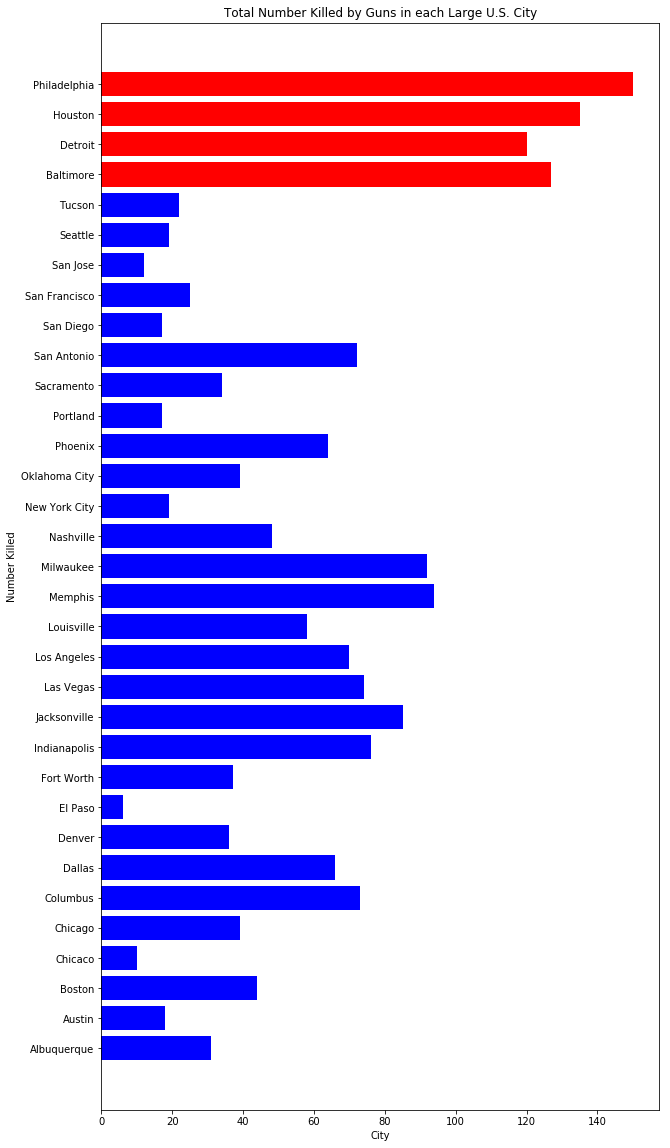

In [100]:
#Creating bar graph to visualize the total amount of gun related deaths in highly populated U.S. cities.

cat1 = data['n_killed'] < 100
cat2 = data['n_killed'] >= 100

plt.figure(figsize=(10,20))
plt.barh(data['city_or_county'][cat1], data['n_killed'][cat1], color = 'blue')
plt.barh(data['city_or_county'][cat2], data['n_killed'][cat2], color = 'red')
plt.xlabel('City')
plt.ylabel('Number Killed')
plt.title('Total Number Killed by Guns in each Large U.S. City')
plt.show()

In [91]:
df =  df.sort_values(by=['age'])

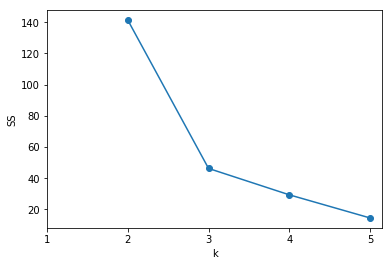

In [92]:
#supplying range of clusters and calculating their inertia

Y = df['n_killed'].values.reshape(-1,1)
ks = range(2,6)
inertias  = []

for k in ks:
    model = KMeans(n_clusters = k, random_state=42)
    
    #fit model to samples
    model.fit(Y)
    
    #append inertia to list of inertias
    inertias.append(model.inertia_)
    
#plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('k')
plt.ylabel('SS')
plt.xticks(list(range(1,6)))
plt.show()

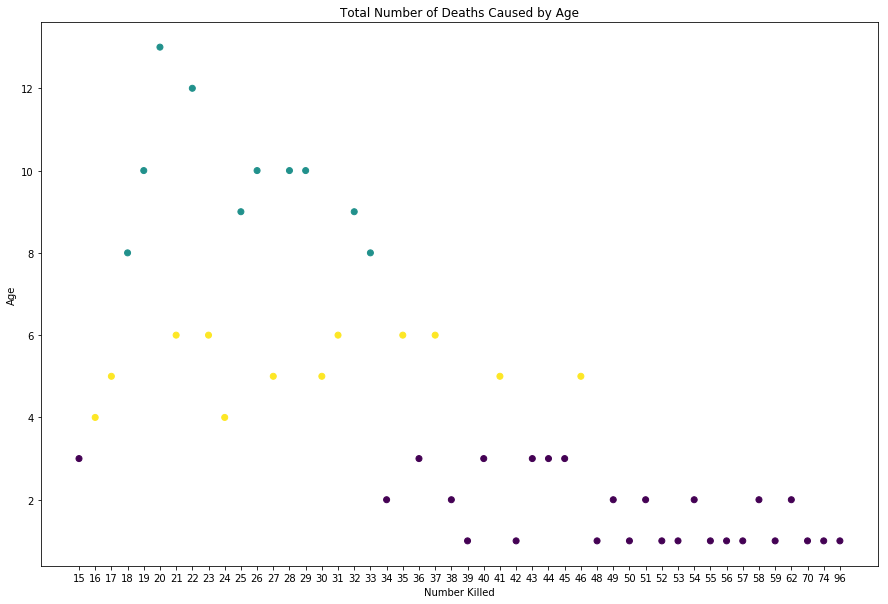

In [93]:
#Creating scatter plot to illustrates number of deaths caused by each age while using 3 clusters as the optimal amount as determined by using the elbow test on the previous plot
Y = df[['n_killed']]

kmeans=KMeans(n_clusters=3)

kmeansoutput=kmeans.fit(Y)

kmeansoutput


plt.figure('3 Cluster K-Means', figsize=(15,10))

plt.scatter(df['age'], df['n_killed'], c=kmeansoutput.labels_)

plt.xlabel('Number Killed')

plt.ylabel('Age')

plt.title('Total Number of Deaths Caused by Age')

plt.show()



In [94]:
#Creating exponential function

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [95]:
#Reshaping data

xdata = df['age'].values.reshape(-1, 1).astype(int)
ydata = df['n_killed'].values.reshape(-1, 1)

In [96]:
popt, pcov = curve_fit(func, xdata.ravel(), ydata.ravel())

c:\users\colew\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [97]:
popt, pcov

(array([16.75380028,  0.01877595, -3.96664731]),
 array([[ 1.93905387e+01, -5.63105764e-02, -2.60429828e+01],
        [-5.63105764e-02,  2.41809766e-04,  9.85071954e-02],
        [-2.60429828e+01,  9.85071954e-02,  4.17895769e+01]]))

Text(0.5, 1.0, 'Total Number of Deaths Caused by Age')

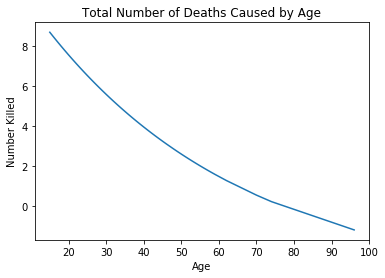

In [98]:
#Creating plot to show the estimated regression in order to better visualize the relationship between number of people killed and age of the shooter
fig, ax = plt.subplots()
plt.plot(xdata, func(xdata, *popt))
ax.set_xlabel('Age')
ax.set_ylabel('Number Killed')
ax.set_title('Total Number of Deaths Caused by Age')